In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset

simul = 'luckym2'

path_data = '/net/ruchba/local/tmp/2/lahaye/'
data_name = '{0}/{1}_diags_ek.av720-1080.nc'.format(simul.upper(),simul)
grid_name = 'prep_LUCKYTO/lucky_corgrd.nc'

picdir = '/home/lahaye/Documents/Results/NRJ_fluxes/{}/'.format(simul.upper())


In [45]:
# Load grid and topo

ncg = Dataset(path_data+grid_name,'r')

lon = ncg.variables['lon_rho'][:]
lat = ncg.variables['lat_rho'][:]
pm = ncg.variables['pm'][:]
pn = ncg.variables['pn'][:]
topo = ncg.variables['h'][:]
mask = topo<10
ncg.close()


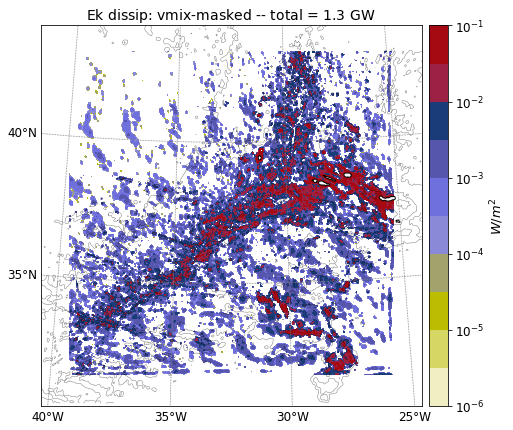

In [66]:
### plot something (raw)
what='vmix-masked'

if '-masked' in what:
    masked = True
    what = what.replace('-masked','')
    monmask = np.ones(toplot.shape)
    isp = 150
    monmask[:isp,:] = 0.; monmask[-isp:,:] = 0
    monmask[:,:isp] = 0.; monmask[:,-isp:] = 0.
    
ncek = Dataset(path_data+data_name,'r')
rho0 = ncek.rho0
toplot = -ncek.variables['ek_{}'.format(what)][:].squeeze()*rho0*pm*pn
ncek.close()

if masked:
    what += '-masked'
    toplot = toplot*monmask

total = np.nansum(toplot/pm/pn)/1e9
### parameters for plotting

fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1500e3,1500e3 # extend in m
cmap = plt.get_cmap('gist_stern_r')
zlevs=[0,2000,3500]
topocol='k'     # isobath. contour color
grdcol='gray'   # grid color
mascale = "log" # 'linear'# 

if mascale == "linear":
    valmax = 0.1
    levels = np.linspace(0,valmax,11)
    levels[0] = levels[1]/2
elif mascale == 'log':
    valmin = 1e-6
    valmax = 0.1
    levels = np.logspace(np.log10(valmin),np.log10(valmax),11)

### do the plot
fig = plt.figure(figsize=(8,7))
ax = plt.subplot(111)
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='black')
bm.fillcontinents(color='white')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)

bm.contour(xx,yy,topo,zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
if mascale == 'linear':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot,mask),levels,\
                      cmap=cmap,extend='max',linestyles=None)
    hcb = bm.colorbar(hpc,extend="max")
    hcb.set_ticks(np.r_[0,hcb.get_ticks()])
    hcb.formatter.set_powerlimits((-1, 1))
    hcb.formatter.set_useMathText(True)
    hcb.update_ticks()
elif mascale == 'log':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot,mask),levels,\
                      cmap=cmap,norm = LogNorm(),linestyles=None)
    hcb = bm.colorbar(hpc,extend="both")
for item in hpc.collections:
    item.set_rasterized('True')
hcb.ax.tick_params(labelsize=fs)
plt.title(r'Ek dissip: {0} -- total = ${1:.1f}$ GW'.format(what,total),fontsize=fs+2)
hcb.set_label(r'$W/m^2$',fontsize=fs+1)   

plt.savefig(picdir+'{0}_EkDiss_{1}_{2}.pdf'.format(simul,what,mascale),magnification='auto',\
            dpi=200,bbox_inches='tight')


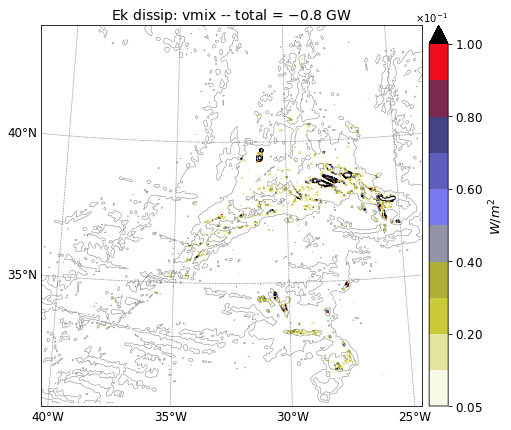

In [59]:
### plot something (combination)
what='vmix'
ncek = Dataset(path_data+data_name,'r')
rho0 = ncek.rho0
if what == 'vmix':
    toplot = (ncek.variables['ek_Drag'][:]-ncek.variables['ek_vmix'][:]).squeeze()*rho0*pm*pn
    monmask = np.ones(toplot.shape)
    isp = 150
    monmask[:isp,:] = 0.; monmask[-isp:,:] = 0
    monmask[:,:isp] = 0.; monmask[:,-isp:] = 0.
    toplot = monmask*toplot
ncek.close()
total = np.nansum(toplot/pm/pn)/1e9
### parameters for plotting

fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1500e3,1500e3 # extend in m
cmap = plt.get_cmap('gist_stern_r')
zlevs=[0,2000,3500]
topocol='k'     # isobath. contour color
grdcol='gray'   # grid color
mascale = "linear" # 'linear'# 

if mascale == "linear":
    valmax = 0.1
    levels = np.linspace(0,valmax,11)
    levels[0] = levels[1]/2
elif mascale == 'log':
    valmin = 1e-6
    valmax = 0.1
    levels = np.logspace(np.log10(valmin),np.log10(valmax),11)

### do the plot
fig = plt.figure(figsize=(8,7))
ax = plt.subplot(111)
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='black')
bm.fillcontinents(color='white')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)

bm.contour(xx,yy,topo,zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
if mascale == 'linear':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot,mask),levels,\
                      cmap=cmap,extend='max',linestyles=None)
    hcb = bm.colorbar(hpc,extend="max")
    hcb.set_ticks(np.r_[0,hcb.get_ticks()])
    hcb.formatter.set_powerlimits((-1, 1))
    hcb.formatter.set_useMathText(True)
    hcb.update_ticks()
elif mascale == 'log':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot,mask),levels,\
                      cmap=cmap,norm = LogNorm(),linestyles=None)
    hcb = bm.colorbar(hpc,extend="both")
for item in hpc.collections:
    item.set_rasterized('True')
hcb.ax.tick_params(labelsize=fs)
plt.title(r'Ek dissip: {0} -- total = ${1:.1f}$ GW'.format(what,total),fontsize=fs+2)
hcb.set_label(r'$W/m^2$',fontsize=fs+1)   

plt.savefig(picdir+'{0}_EkDiss_{1}_{2}.pdf'.format(simul,what,mascale),magnification='auto',\
            dpi=200,bbox_inches='tight')

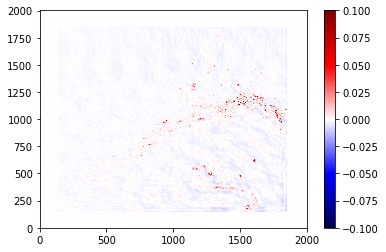

In [62]:
plt.pcolormesh(toplot,cmap='seismic',vmax=0.1,vmin=-0.1); plt.colorbar()